<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/UMAP_DBCAN_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ckd/data.csv")

In [ ]:
#select columns
select_columns = ['Age', 'BMI',  'BSA', 'Diastolic-BP', 'Systolic-BP',
 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
    'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy',
   'L2-BUN','L3-Creatinine','L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
select_columns = df[select_columns]

##Feature Scaling (Standard Scaler)

In [ ]:
from sklearn.preprocessing import StandardScaler
#data scale
scaler = StandardScaler()
data_scale = scaler.fit_transform(select_columns)
data_scale = pd.DataFrame(data_scale, columns=select_columns.columns)

#add colums 'InPatient', 'OutPatient', 'Emergency', 'NATNL', 'Sex'
additional_columns = df[['InPatient', 'OutPatient', 'Emergency', 'LabLocation', 'NATNL', 'Sex']]
data_scale = pd.concat([data_scale, additional_columns], axis=1)

In [ ]:
data_scale.head()

,Age,BMI,BSA,Diastolic-BP,Systolic-BP,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,...,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,InPatient,OutPatient,Emergency,LabLocation,NATNL,Sex
0,0.531249,-1.055973,-1.625472,0.160130,-0.525000,2.991739,-0.698699,-0.129510,-0.176477,-0.333859,...,-0.803614,0.321723,3.686025,-1.158713,0,1,0,1,0,1
1,0.617111,-1.201074,-1.686392,-0.793624,-1.800103,2.991739,1.392719,-0.129510,-0.176477,-0.333859,...,-1.038268,0.983545,1.640595,-1.258996,0,1,0,1,0,1
2,0.702974,-1.077875,-1.686392,0.246834,0.112551,3.360578,1.625099,4.073425,-0.176477,-0.333859,...,-1.065875,0.494372,1.011232,-0.988847,0,1,0,1,0,1
3,0.788837,-1.201074,-1.808232,-0.620214,-0.119286,0.963126,-0.698699,-0.005894,2.205286,-0.333859,...,-0.969252,0.782121,1.876606,-0.884842,0,1,0,1,0,1
4,0.960563,-1.535080,-1.990992,-1.400558,-1.916021,3.360578,-0.698699,1.724726,-0.176477,-0.333859,...,-0.900236,0.494372,0.617880,-1.026662,0,1,0,1,0,1


In [ ]:
data_scale.shape

(52620, 72)

In [ ]:
#ตัวแปรทั้งหมดที่ใช้ 72 ตัวแปร มีดังนี้
#VisitLOcation มี 192 นำออกไม่ได้ใช้
data_scale.columns

Index(['Age', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP', 'G1M2-ARB',
       'G3M1-Statin', 'G5M2-NSAIDs', 'G1M5-Diuretic', 'G1M7-Beta-blocker',
       'G1M3-Dihydropyridine-CCB', 'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin',
       'G2M3-DPP4-inhibitor', 'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i',
       'G4M1-Allopurinol', 'G1M9-Vasodilator', 'G1M8-Alpha-blocker',
       'G2M6-Insulin', 'G2M4-TZD', 'G4M2-Febuxostat', 'G3M2-Ezetimibe',
       'G1M4-Non-dihydropyridine-CCB', 'G5M1-Ketoanalog-amino-acid',
       'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent', 'D1-Hypertension',
       'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine', 'L4-Sodium',
      

In [ ]:
#data_scale.to_csv('data_scale.csv')

##UMAP

In [ ]:
pip install umap-learn

In [ ]:
from umap import UMAP

X = data_scale.copy()
# compute 2D embedding of raw variable values
X_2d = UMAP(
  n_components=2, n_neighbors=200, min_dist=0
).fit_transform(X)

<ipython-input-183-28da69fc407e>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_2d[:, 0], X_2d[:, 1], marker='o', s=5, cmap='viridis')


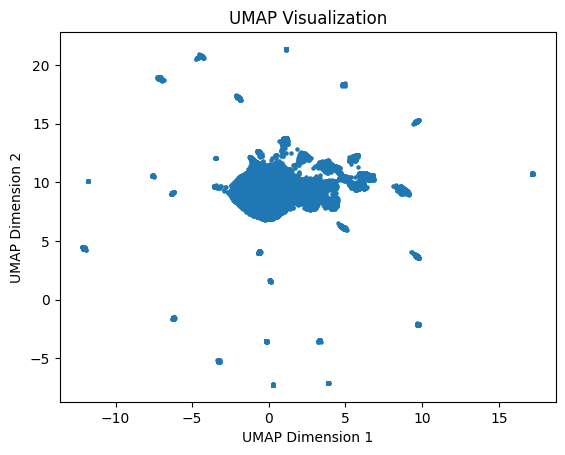

In [ ]:
import matplotlib.pyplot as plt
# Assuming X_2d is your 2D embedding
plt.scatter(X_2d[:, 0], X_2d[:, 1], marker='o', s=5, cmap='viridis')

# Add labels and title if needed
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization')

# Show the plot
plt.show()

### DBSCAN

นำข้อมูลที่ทำ  UMAP แล้วมาทำ Clustering

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

data = X_2d.copy()

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

# Create an instance of DBSCAN
dbscan = DBSCAN()

# Fit the DBSCAN model
dbscan.fit(data)

# ต้องการหาระยะห่างระหว่างจุดหนึ่งกับจุดข้อมูลที่ใกล้ที่สุดสำหรับจุดข้อมูลทั้งหมดในชุดข้อมูล
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

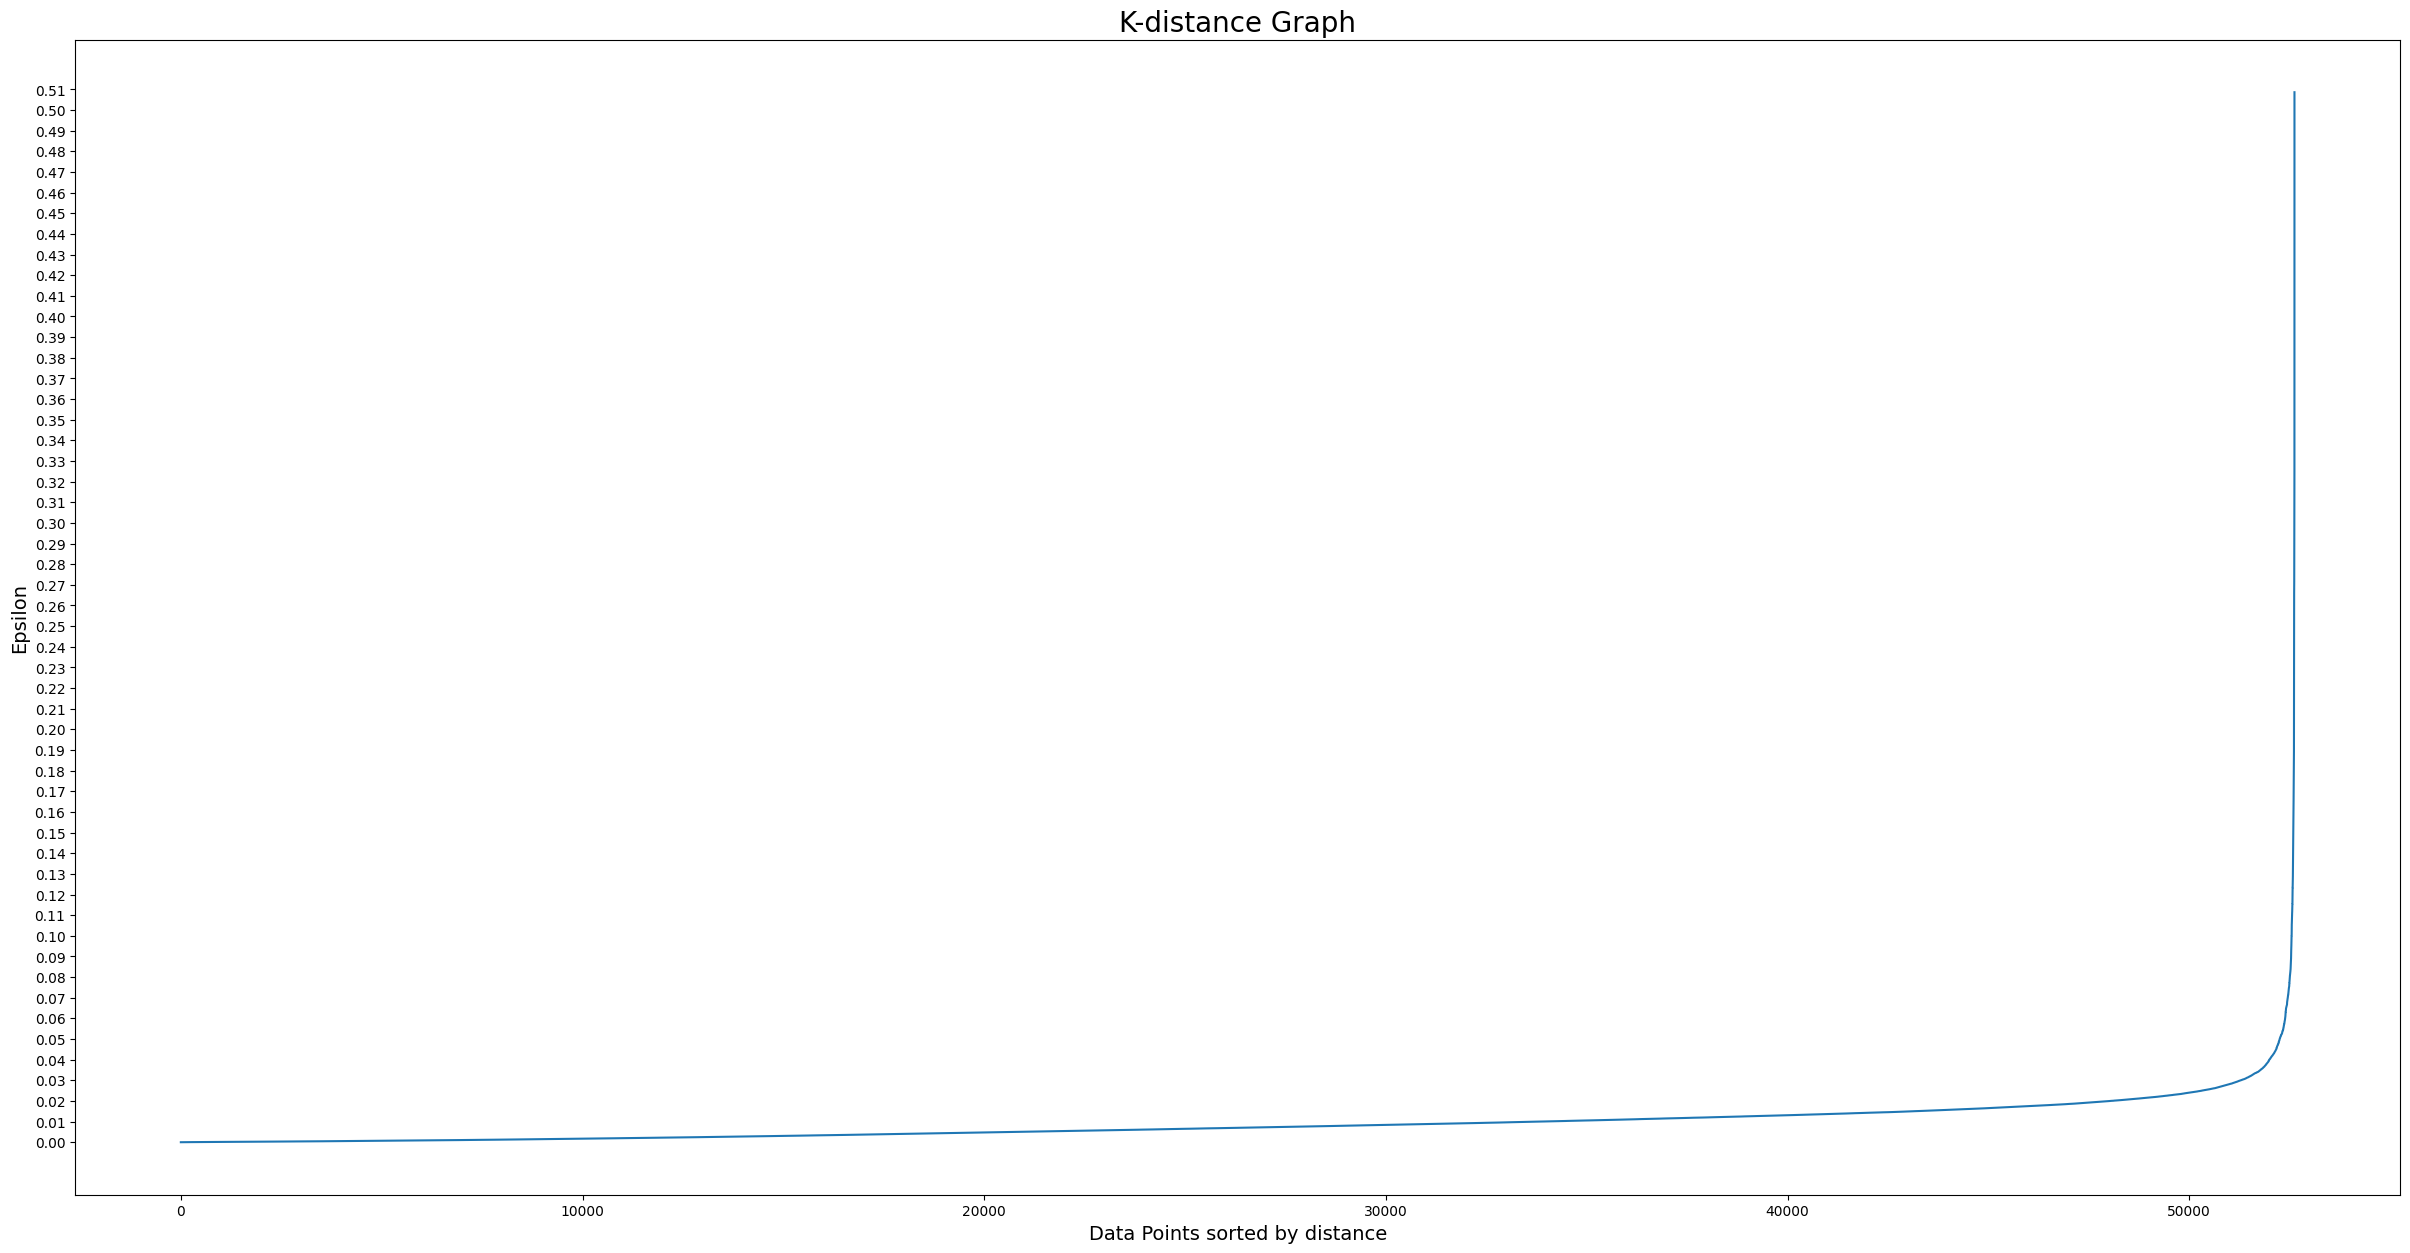

In [ ]:
# ใช้ K-distance Graph เพื่อค้นหาค่าของ epsilon ที่เหมาะสม
# Plotting K-distance Graph
# Sort distances array
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot the graph
plt.figure(figsize=(30, 15))
plt.plot(distances)

# Set y-axis ticks with increments of 0.1
max_distance = distances.max()
plt.yticks(np.arange(0, max_distance + 0.01, step=0.01))

plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

ค่าที่เหมาะสมที่สุดของ epsilon อยู่ที่จุดโค้งสูงสุดใน K-distance Graph คือประมาณ 0.05

ใช้ ค่า Silhouette Coefficient  เป็นตัวชี้วัดในการวัดประเมินการจัดกลุ่ม
- ค่า Silhouette Coefficient เป็นตัววัดที่ใช้วัดความคล้ายคลึงภายในกลุ่มและความแตกต่างระหว่างกลุ่ม
- ค่า Silhouette Coefficient มีค่าอยู่ในช่วง [-1, 1] โดยค่าที่ใกล้ 1 จะแสดงถึงการแบ่งกลุ่มที่ดี และค่าที่ใกล้ -1 จะแสดงถึงการแบ่งกลุ่มที่ไม่ดี


In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.06, min_samples=450).fit(data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels):.2f}")

Estimated number of clusters: 6
Estimated number of noise points: 49112
Silhouette Coefficient: 0.34


In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.06, min_samples=480).fit(data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels):.2f}")

Estimated number of clusters: 6
Estimated number of noise points: 49282
Silhouette Coefficient: 0.33


In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.05, min_samples=480).fit(data)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels):.2f}")

Estimated number of clusters: 3
Estimated number of noise points: 50855
Silhouette Coefficient: 0.49


ได้ทำการปรับค่า epsilon และ min_sample ซึ่ง eps=0.048, min_samples=440 ได้ค่ามากที่สุดคือ
- จำนวนกลุ่มทัั้งหมด 3 กลุ่ม
- มีค่า noise ทั้งหมด 50,855 ซึ่งจำนวนข้อมูลทั้งหมดคือ 52,620 เหลือข้อมูลทั้งหมดในกลุ่ม 1,765
- ถ้าค่า eps ต่ำ ค่า Noise เยอะ ค่า Silhouette จะดี

In [ ]:
import numpy as np

# Find unique labels
unique_labels = np.unique(labels)

# Count the number of data points in each cluster
for label in unique_labels:
    if label == -1:
        # Skip noise points
        continue
    # Create a boolean mask for the current cluster
    cluster_mask = (labels == label)
    # Count the number of data points in the cluster
    num_points = np.sum(cluster_mask)
    print(f"Cluster {label}: {num_points} data points")

Cluster 0: 635 data points
Cluster 1: 579 data points
Cluster 2: 551 data points


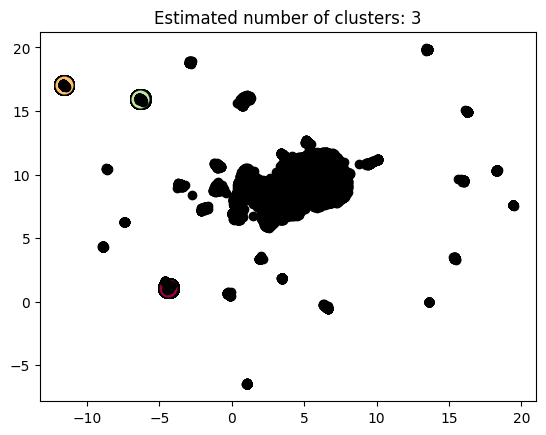

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

จากภาพสีดำคือค่า Noise

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/,

https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/

###SHAP

ข้อมูลทั้ง

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming you have your scaled data in scaled_wine_df

# Apply DBSCAN clustering
dbscan_model = DBSCAN(eps=0.05, min_samples=480)
cluster_labels = dbscan_model.fit_predict(data)

# Since DBSCAN might assign -1 to noise points, we need to map labels to start from 0
cluster_labels += 1
num_clusters = len(np.unique(cluster_labels))

# Binarize cluster labels
y = label_binarize(cluster_labels, classes=range(num_clusters))

# Assuming your original data is in wine_df
clf = RandomForestClassifier()
clf.fit(data, y)


RandomForestClassifier()

In [ ]:
pip install shap

In [ ]:
import shap
explainer= shap.TreeExplainer(clf)
shap_values = explainer(data).values

In [ ]:
shap.plots.beeswarm(shap_values)

TypeError: The beeswarm plot requires an `Explanation` object as the `shap_values` argument.

In [ ]:
shap.summary_plot(shap_values[0], data)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.